In [10]:
import mlrose_hiive as mlrose
import pandas as pd
import numpy as np
import joblib
from tqdm import tqdm
import time

In [2]:
import sklearn

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from mlrose_hiive.fitness import MaxKColor
from mlrose_hiive.generators import MaxKColorGenerator

In [6]:
from IPython.core.display import display, HTML 

#### define maxkcolors with generator set - same initial state seed, same size for nodes

In [7]:
maxKColor_problem_100 = MaxKColorGenerator.generate(seed=428, number_of_nodes=100, maximize=True)
maxKColor_problem_50 = MaxKColorGenerator.generate(seed=428, number_of_nodes=50, maximize=True)
maxKColor_problem_25 = MaxKColorGenerator.generate(seed=428, number_of_nodes=25, maximize=True)

#### run SA, GA and RHC with seed=55 for apples-to-apples comparison

## Simulated Annealing (SA)

In [8]:
from mlrose_hiive.runners import SARunner

#### use SARunner class to determine ideal temperature for nodes = 50

In [13]:
sa_runner = mlrose.SARunner(problem=maxkcolor_problem_50,
                            experiment_name="SA_maxKColors50_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
# sa_run_stats

In [14]:
sa_run_curves.describe()

,Iteration,Time,Fitness,FEvals,max_iters
count,7023.00000,7023.000000,7023.000000,7023.000000,7023.0
mean,309.13470,0.086986,114.738858,596.831981,2048.0
std,220.66926,0.073692,4.868640,423.951663,0.0
min,0.00000,0.000250,103.000000,0.000000,2048.0
25%,117.00000,0.033720,111.000000,219.000000,2048.0
50%,277.00000,0.053619,114.000000,539.000000,2048.0
75%,462.00000,0.135345,119.000000,904.000000,2048.0
max,894.00000,0.251305,123.000000,1625.000000,2048.0


In [15]:
sa_run_curves.to_csv('sa_maxKColor50_temp_results.csv', index=False)

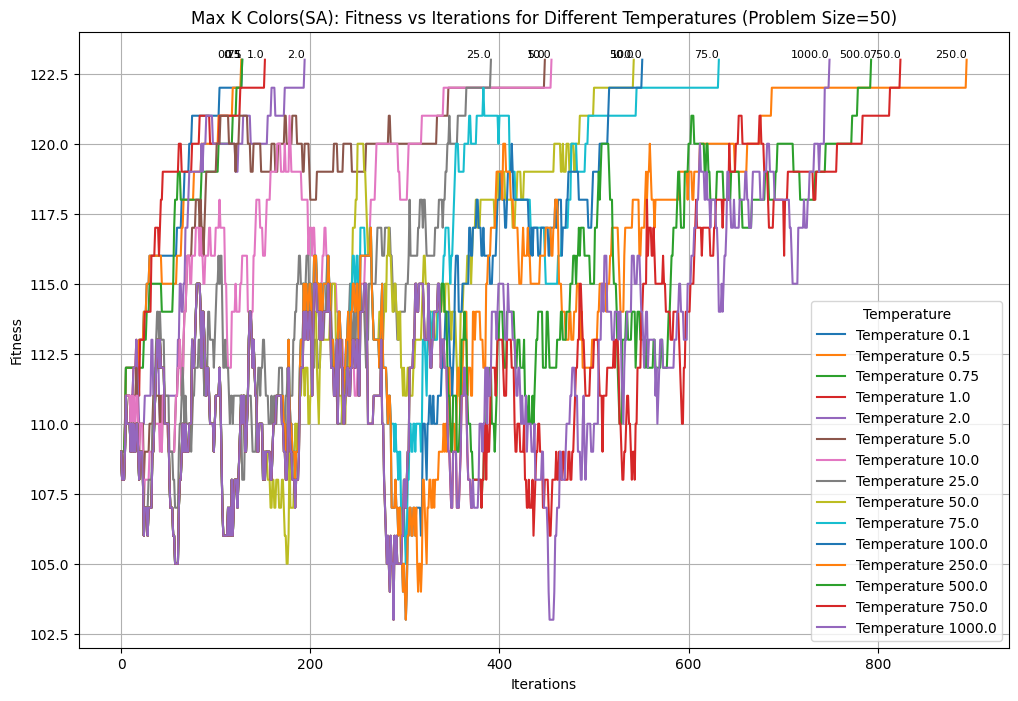

In [38]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_maxKColor50_temp_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
        plt.text(temp_df['Iteration'].iloc[-1], temp_df['Fitness'].iloc[-1], f'{temp}', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=8)
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Max K Colors(SA): Fitness vs Iterations for Different Temperatures (Problem Size=50)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_maxKColor50_temp_results.csv')

In [20]:
df_temp_size50 = pd.read_csv('sa_maxKColor50_temp_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())
# print(best_runs.shape) 

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
128,128,0.251305,123.0,217.0,0.10,2048
256,127,0.251045,123.0,209.0,0.50,2048
385,128,0.251305,123.0,217.0,0.75,2048
538,152,0.017651,123.0,246.0,1.00,2048
733,194,0.031078,123.0,341.0,2.00,2048
1182,448,0.044855,123.0,762.0,5.00,2048
1638,455,0.049991,123.0,806.0,10.00,2048
2030,391,0.016989,123.0,742.0,25.00,2048
2573,542,0.012549,123.0,1007.0,50.00,2048
3206,632,0.071796,123.0,1161.0,75.00,2048


In [18]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
4653,894,0.093872,123.0,1625.0,250.0,2048


Best initial temperature for nodes=50 is 250.

#### determine ideal temp for nodes=100

In [23]:
sa_runner = mlrose.SARunner(problem=maxKColor_problem_100,
                            experiment_name="SA_maxKColors100_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose.GeomDecay])
# sa_runner.run()

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
# sa_run_stats

In [24]:
sa_run_curves.describe()

,Iteration,Time,Fitness,FEvals,max_iters
count,10669.000000,10669.000000,10669.000000,10669.000000,10669.0
mean,406.134033,0.161854,218.230293,758.877683,2048.0
std,290.683683,0.105198,9.614081,539.559005,0.0
min,0.000000,0.000380,197.000000,0.000000,2048.0
25%,177.000000,0.067994,210.000000,332.000000,2048.0
50%,359.000000,0.142243,219.000000,667.000000,2048.0
75%,564.000000,0.252936,228.000000,1076.000000,2048.0
max,1367.000000,0.360437,230.000000,2438.000000,2048.0


In [25]:
sa_run_curves.to_csv('sa_maxKColor100_temp_results.csv', index=False)

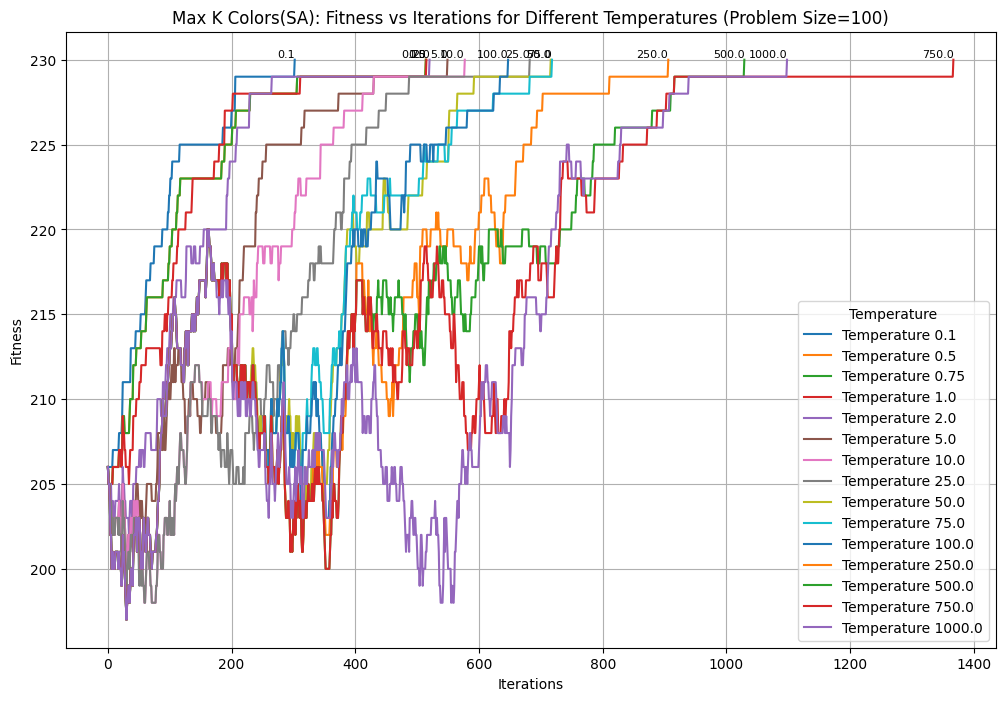

In [37]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_maxKColor100_temp_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
        plt.text(temp_df['Iteration'].iloc[-1], temp_df['Fitness'].iloc[-1], f'{temp}', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=8)
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Max K Colors(SA): Fitness vs Iterations for Different Temperatures (Problem Size=100)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_maxKColor100_temp_results.csv')

In [27]:
df_temp_size50 = pd.read_csv('sa_maxKColor100_temp_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
302,302,0.360437,230.0,494.0,0.10,2048
817,514,0.117226,230.0,854.0,0.50,2048
1332,514,0.117226,230.0,854.0,0.75,2048
1848,515,0.117683,230.0,865.0,1.00,2048
2369,520,0.119925,230.0,888.0,2.00,2048
2919,549,0.131085,230.0,940.0,5.00,2048
3497,577,0.148311,230.0,1021.0,10.00,2048
4180,682,0.202099,230.0,1202.0,25.00,2048
4897,716,0.221584,230.0,1290.0,50.00,2048
5616,718,0.222319,230.0,1298.0,75.00,2048


In [28]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
9569,1367,0.034395,230.0,2438.0,750.0,2048


Best initial temperature for 100 nodes is 750.

#### determine ideal temp for nodes=25

In [29]:
sa_runner = mlrose.SARunner(problem=maxKColor_problem_25,
                            experiment_name="SA_maxKColors25_Experiment",
                            output_directory=None,  
                            seed=55,
                            iteration_list=2**np.arange(12),  
                            max_attempts=200,
                            temperature_list=[0.1, 0.5, 0.75, 1.0, 2.0, 5.0, 10.0, 25.0, 50.0, 75.0, 100.0, 250.0, 500.0, 750.0, 1000.0],
                            decay_list=[mlrose.GeomDecay])

# Run the experiment
sa_run_stats, sa_run_curves = sa_runner.run()
# sa_run_stats

In [30]:
sa_run_curves.describe()

,Iteration,Time,Fitness,FEvals,max_iters
count,5291.000000,5291.000000,5291.000000,5291.000000,5291.0
mean,239.779248,0.039091,49.734455,468.680212,2048.0
std,167.545655,0.026281,2.460036,330.269075,0.0
min,0.000000,0.000151,41.000000,0.000000,2048.0
25%,92.000000,0.021392,48.000000,179.500000,2048.0
50%,217.000000,0.030836,50.000000,422.000000,2048.0
75%,367.000000,0.049524,51.000000,717.000000,2048.0
max,639.000000,0.104774,55.000000,1261.000000,2048.0


In [31]:
sa_run_curves.to_csv('sa_maxKColor25_temp_results.csv', index=False)

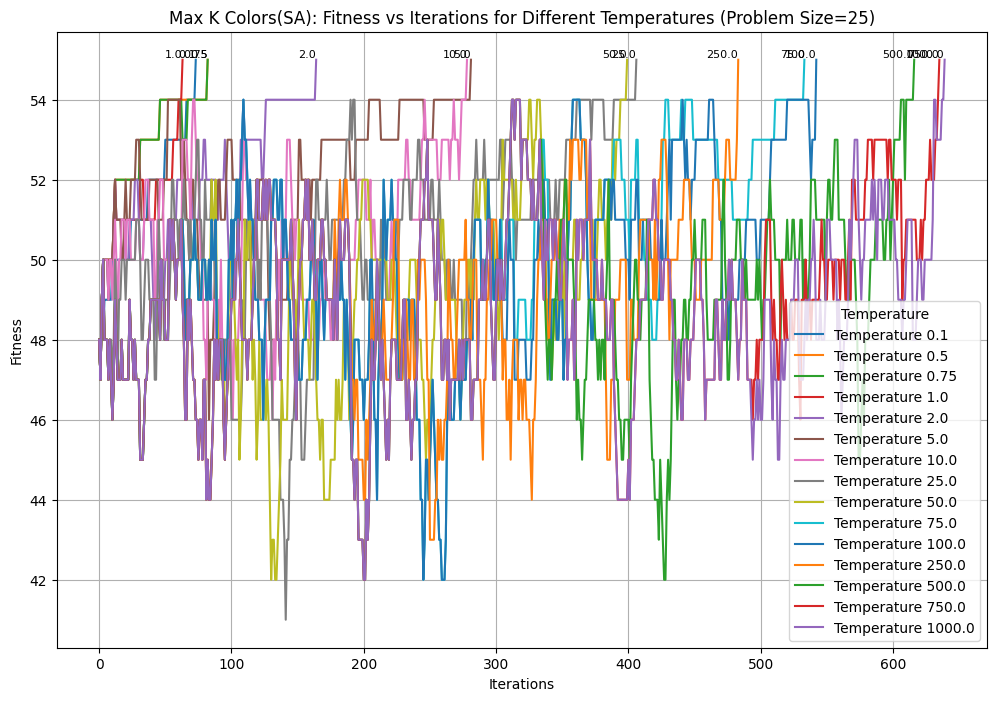

In [36]:
def extract_initial_temperature(temp):
    """Extracts initial temperature from a GeomDecay object or returns the numeric value."""
    if isinstance(temp, str) and 'GeomDecay' in temp:
        # Assuming the temperature is embedded in a string like 'GeomDecay(init_temp=10.0)'
        import re
        match = re.search(r'init_temp=([\d.]+)', temp)
        if match:
            return float(match.group(1))
    elif isinstance(temp, float):
        return temp
    else:
        raise ValueError(f"Unexpected temperature format: {temp}")

def plot_fitness_iterations(csv_path):
    # Load the CSV file
    df_temp_size100 = pd.read_csv('sa_maxKColor25_temp_results.csv')
    
    # Extract and handle temperature values correctly
    df_temp_size100['Temperature'] = df_temp_size100['Temperature'].apply(extract_initial_temperature)
    
    # Plot fitness over iterations for each temperature
    plt.figure(figsize=(12, 8))
    
    temperatures = df_temp_size100['Temperature'].unique()
    
    for temp in temperatures:
        temp_df = df_temp_size100[df_temp_size100['Temperature'] == temp]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Temperature {temp}')
        plt.text(temp_df['Iteration'].iloc[-1], temp_df['Fitness'].iloc[-1], f'{temp}', 
                 verticalalignment='bottom', horizontalalignment='right', fontsize=8)
    
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title('Max K Colors(SA): Fitness vs Iterations for Different Temperatures (Problem Size=25)')
    plt.legend(title='Temperature')
    plt.grid(True)
    plt.show()

# Call the function with the CSV file path
plot_fitness_iterations('/mnt/data/sa_maxKColor25_temp_results.csv')

df_temp_size50 = pd.read_csv('sa_maxKColor25_temp_results.csv')

best_fitness = df_temp_size50['Fitness'].max()
best_runs = df_temp_size50[df_temp_size50['Fitness'] == best_fitness]

HTML(best_runs.to_html())

In [34]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
5290,639,0.056249,55.0,1261.0,1000.0,2048


Best initial temperature for 25 nodes is 1000.

#### determine optimal decay given discovered optimal temps for each problem size

In [55]:
# Define decay types
decay_types = {
    'arith_decay': mlrose.ArithDecay,
    'exp_decay': mlrose.ExpDecay,
    'geom_decay': mlrose.GeomDecay
}

all_run_stats = []
all_run_curves = []

#### determine best decay (nodes=50, temp=250)

In [43]:
# Run SARunner for each decay type
for decay_name, decay_class in decay_types.items():
    sa_runner = mlrose.SARunner(
        problem=maxKColor_problem_50,
        experiment_name=f"SA_maxKColor50_Experiment_{decay_name}",
        output_directory=None,
        seed=55,
        iteration_list=2**np.arange(12),
        max_attempts=200,
        temperature_list=[250],
        decay_list=[decay_class]
    )

    # Run the experiment
    sa_run_stats, sa_run_curves = sa_runner.run()

    # Add decay type to the results
    sa_run_stats['Decay_Type'] = decay_name
    sa_run_curves['Decay_Type'] = decay_name

    # Append to the list of all results
    all_run_stats.append(sa_run_stats)
    all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_maxKColor50_decay_stats.csv', index=False)
combined_run_curves.to_csv('sa_maxKColor50_decay_curves.csv', index=False)

# Print the combined run curves to check
print(combined_run_curves.head())

   Iteration      Time  Fitness  FEvals Temperature  max_iters   Decay_Type
0          0  0.000470    109.0     0.0         250       2048  arith_decay
1          1  0.027959    108.0     2.0         250       2048  arith_decay
2          2  0.061737    108.0     4.0         250       2048  arith_decay
3          3  0.097056    108.0     6.0         250       2048  arith_decay
4          4  0.102046    109.0     8.0         250       2048  arith_decay


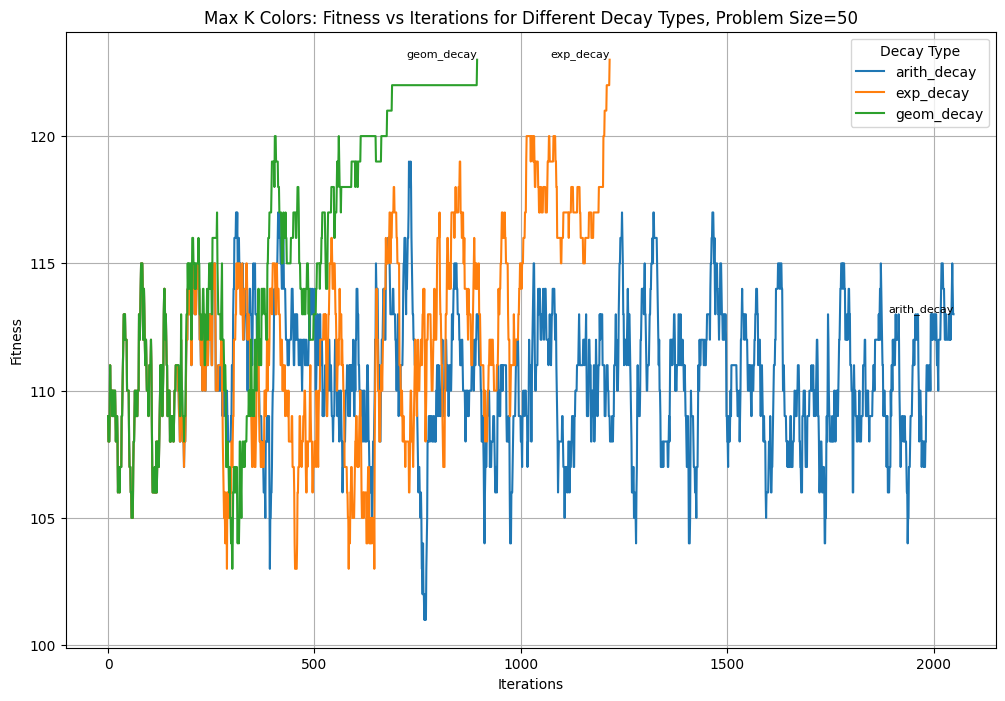

In [46]:
curve_df = pd.read_csv('sa_maxKColor50_decay_curves.csv')

# Plot fitness over iterations for each decay type
plt.figure(figsize=(12, 8))

decay_types = curve_df['Decay_Type'].unique()

for decay in decay_types:
    decay_curve_df = curve_df[curve_df['Decay_Type'] == decay]
    plt.plot(decay_curve_df['Iteration'], decay_curve_df['Fitness'], label=decay)
    plt.text(decay_curve_df['Iteration'].iloc[-1], decay_curve_df['Fitness'].iloc[-1], f'{decay}', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=8)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Max K Colors: Fitness vs Iterations for Different Decay Types, Problem Size=50')
plt.legend(title='Decay Type')
plt.grid(True)
plt.show()


In [47]:
best_fitness = curve_df['Fitness'].max()
best_runs = curve_df[curve_df['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,Decay_Type
3264,1215,0.628833,123.0,2349.0,250,2048,exp_decay
4159,894,0.409989,123.0,1625.0,250,2048,geom_decay


In [48]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,Decay_Type
3264,1215,0.628833,123.0,2349.0,250,2048,exp_decay


For SA, temp=250, nodes=50, exp decay is the best decay.

#### determine best decay (nodes=100, temp=750)

In [51]:
# Run SARunner for each decay type
for decay_name, decay_class in decay_types.items():
    sa_runner = mlrose.SARunner(
        problem=maxKColor_problem_100,
        experiment_name=f"SA_maxKColor100_Experiment_{decay_name}",
        output_directory=None,
        seed=55,
        iteration_list=2**np.arange(12),
        max_attempts=200,
        temperature_list=[750],
        decay_list=[decay_class]
    )

    # Run the experiment
    sa_run_stats, sa_run_curves = sa_runner.run()

    # Add decay type to the results
    sa_run_stats['Decay_Type'] = decay_name
    sa_run_curves['Decay_Type'] = decay_name

    # Append to the list of all results
    all_run_stats.append(sa_run_stats)
    all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_maxKColor100_decay_stats.csv', index=False)
combined_run_curves.to_csv('sa_maxKColor100_decay_curves.csv', index=False)

# Print the combined run curves to check
print(combined_run_curves.head())

   Iteration      Time  Fitness  FEvals Temperature  max_iters   Decay_Type
0          0  0.002209    206.0     0.0         750       2048  arith_decay
1          1  0.005785    205.0     2.0         750       2048  arith_decay
2          2  0.024787    205.0     4.0         750       2048  arith_decay
3          3  0.032984    204.0     6.0         750       2048  arith_decay
4          4  0.034257    202.0     8.0         750       2048  arith_decay


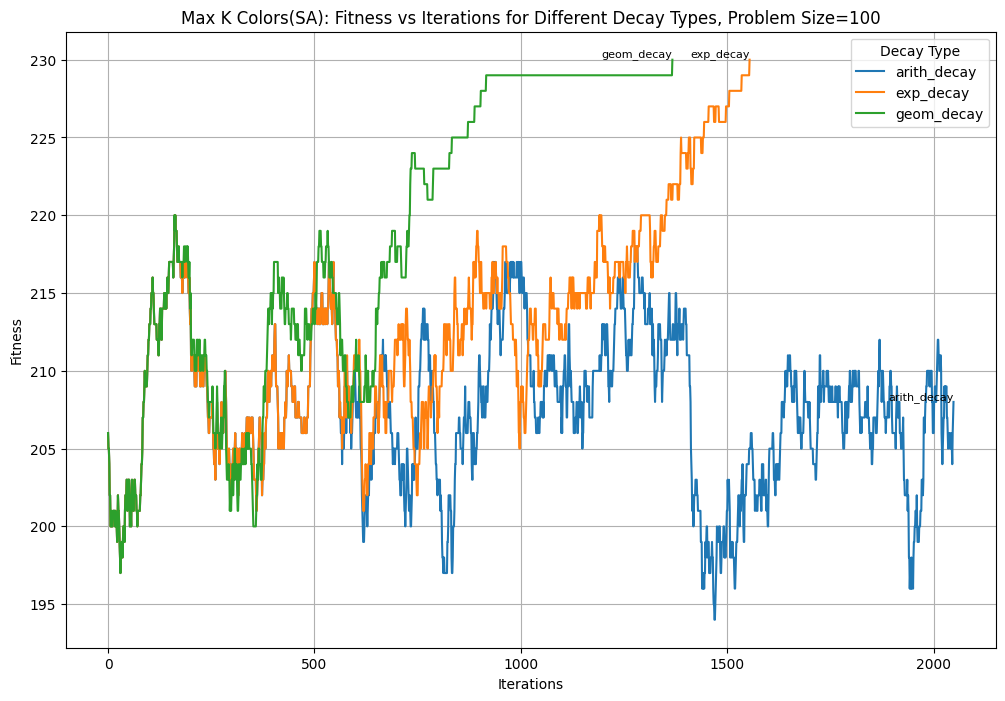

In [52]:
curve_df = pd.read_csv('sa_maxKColor100_decay_curves.csv')

# Plot fitness over iterations for each decay type
plt.figure(figsize=(12, 8))

decay_types = curve_df['Decay_Type'].unique()

for decay in decay_types:
    decay_curve_df = curve_df[curve_df['Decay_Type'] == decay]
    plt.plot(decay_curve_df['Iteration'], decay_curve_df['Fitness'], label=decay)
    plt.text(decay_curve_df['Iteration'].iloc[-1], decay_curve_df['Fitness'].iloc[-1], f'{decay}', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=8)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Max K Colors(SA): Fitness vs Iterations for Different Decay Types, Problem Size=100')
plt.legend(title='Decay Type')
plt.grid(True)
plt.show()


In [53]:
best_fitness = curve_df['Fitness'].max()
best_runs = curve_df[curve_df['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,Decay_Type
3603,1554,1.094690,230.0,2979.0,750,2048,exp_decay
4971,1367,0.744166,230.0,2438.0,750,2048,geom_decay


In [54]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,Decay_Type
3603,1554,1.09469,230.0,2979.0,750,2048,exp_decay


For SA, temp=750, nodes=100, exp decay is the best decay.

#### determine best decay (nodes=25, temp=1000)

In [56]:
# Run SARunner for each decay type
for decay_name, decay_class in decay_types.items():
    sa_runner = mlrose.SARunner(
        problem=maxKColor_problem_25,
        experiment_name=f"SA_maxKColor25_Experiment_{decay_name}",
        output_directory=None,
        seed=55,
        iteration_list=2**np.arange(12),
        max_attempts=200,
        temperature_list=[1000],
        decay_list=[decay_class]
    )

    # Run the experiment
    sa_run_stats, sa_run_curves = sa_runner.run()

    # Add decay type to the results
    sa_run_stats['Decay_Type'] = decay_name
    sa_run_curves['Decay_Type'] = decay_name

    # Append to the list of all results
    all_run_stats.append(sa_run_stats)
    all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_maxKColor25_decay_stats.csv', index=False)
combined_run_curves.to_csv('sa_maxKColor25_decay_curves.csv', index=False)

# Print the combined run curves to check
print(combined_run_curves.head())

   Iteration      Time  Fitness  FEvals Temperature  max_iters   Decay_Type
0          0  0.000453     48.0     0.0        1000       2048  arith_decay
1          1  0.005173     47.0     2.0        1000       2048  arith_decay
2          2  0.011733     49.0     4.0        1000       2048  arith_decay
3          3  0.021207     50.0     6.0        1000       2048  arith_decay
4          4  0.022309     48.0     8.0        1000       2048  arith_decay


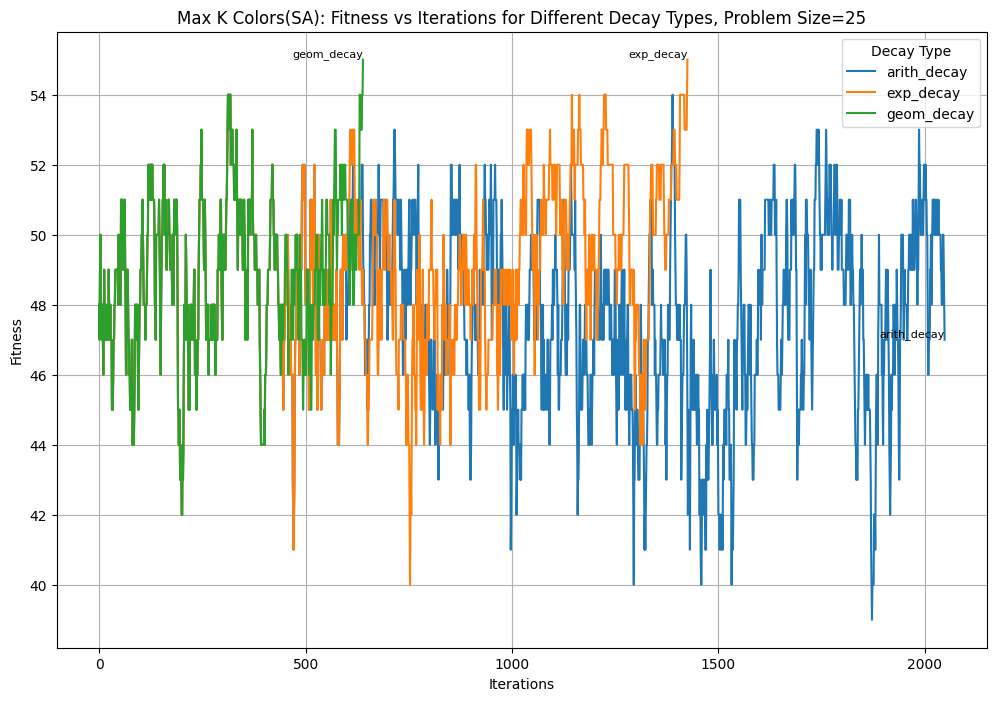

In [57]:
curve_df = pd.read_csv('sa_maxKColor25_decay_curves.csv')

# Plot fitness over iterations for each decay type
plt.figure(figsize=(12, 8))

decay_types = curve_df['Decay_Type'].unique()

for decay in decay_types:
    decay_curve_df = curve_df[curve_df['Decay_Type'] == decay]
    plt.plot(decay_curve_df['Iteration'], decay_curve_df['Fitness'], label=decay)
    plt.text(decay_curve_df['Iteration'].iloc[-1], decay_curve_df['Fitness'].iloc[-1], f'{decay}', 
         verticalalignment='bottom', horizontalalignment='right', fontsize=8)

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Max K Colors(SA): Fitness vs Iterations for Different Decay Types, Problem Size=25')
plt.legend(title='Decay Type')
plt.grid(True)
plt.show()


In [58]:
best_fitness = curve_df['Fitness'].max()
best_runs = curve_df[curve_df['Fitness'] == best_fitness]

HTML(best_runs.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,Decay_Type
3474,1425,0.571056,55.0,2763.0,1000,2048,exp_decay
4114,639,0.154859,55.0,1261.0,1000,2048,geom_decay


In [59]:
maximum_evaluations = best_runs['FEvals'].max()

best_curve_run = best_runs[best_runs['FEvals'] == maximum_evaluations]
HTML(best_curve_run.to_html())

,Iteration,Time,Fitness,FEvals,Temperature,max_iters,Decay_Type
3474,1425,0.571056,55.0,2763.0,1000,2048,exp_decay


For SA, temp=1000, nodes=25, exp decay is the best decay.

#### having determined optimal hyperparams (decay, temp) for nodes=25,50,100 run across multiple seeds, average and plot


since exp_decay and geom_decay both return same fitness at same temperature, plot both (for nodes=25, 50 and 100). 

In [61]:
# Define problem sizes, seeds, and hyperparameters determined in previous grid search 
experiments = [
    {'size': 25, 'problem': maxKColor_problem_25, 'temp': 1000, 'decay': mlrose.ExpDecay, 'decay_name': 'exp_decay'},
    {'size': 25, 'problem': maxKColor_problem_25, 'temp': 1000, 'decay': mlrose.GeomDecay, 'decay_name': 'geom_decay'},
    {'size': 50, 'problem': maxKColor_problem_50, 'temp': 250, 'decay': mlrose.ExpDecay, 'decay_name': 'exp_decay'},
    {'size': 50, 'problem': maxKColor_problem_50, 'temp': 250, 'decay': mlrose.GeomDecay, 'decay_name': 'geom_decay'},
    {'size': 100, 'problem': maxKColor_problem_100, 'temp': 750, 'decay': mlrose.ExpDecay, 'decay_name': 'exp_decay'},
    {'size': 100, 'problem': maxKColor_problem_100, 'temp': 750, 'decay': mlrose.GeomDecay, 'decay_name': 'geom_decay'}
]
seeds = [55, 888, 12345]
iteration_list = 2**np.arange(12)
max_attempts = 200

all_run_stats = []
all_run_curves = []

# Run SARunner for each experiment and seed
for experiment in experiments:
    size = experiment['size']
    problem = experiment['problem']
    temp = experiment['temp']
    decay_class = experiment['decay']
    decay_name = experiment['decay_name']
    
    for seed in seeds:
        # Initialize the SARunner
        sa_runner = mlrose.SARunner(
            problem=problem,
            experiment_name=f"SA_maxKColor_Size{size}_Seed{seed}_{decay_name}",
            output_directory=None,
            seed=seed,
            iteration_list=iteration_list,
            max_attempts=max_attempts,
            temperature_list=[temp],
            decay_list=[decay_class]
        )
        
        # Measure wall clock time
        start_time = time.time()
        sa_run_stats, sa_run_curves = sa_runner.run()
        end_time = time.time()
        wall_clock_time = end_time - start_time
        
        # Add metadata to the results
        sa_run_stats['Decay_Type'] = decay_name
        sa_run_stats['Problem_Size'] = size
        sa_run_stats['Seed'] = seed
        sa_run_stats['Wall_Clock_Time'] = wall_clock_time
        
        sa_run_curves['Decay_Type'] = decay_name
        sa_run_curves['Problem_Size'] = size
        sa_run_curves['Seed'] = seed
        
        # Append to the list of all results
        all_run_stats.append(sa_run_stats)
        all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_maxKcolor_experiments_stats.csv', index=False)
combined_run_curves.to_csv('sa_maxKcolor_experiments_curves.csv', index=False)

#### test performance of different decays on one seed for pairwise comparison

In [64]:
# Define problem sizes, seeds, and hyperparameters determined in previous grid search 
experiments = [
    {'size': 25, 'problem': maxKColor_problem_25, 'temp': 1000, 'decay': mlrose.ExpDecay, 'decay_name': 'exp_decay'},
    {'size': 25, 'problem': maxKColor_problem_25, 'temp': 1000, 'decay': mlrose.GeomDecay, 'decay_name': 'geom_decay'},
    {'size': 50, 'problem': maxKColor_problem_50, 'temp': 250, 'decay': mlrose.ExpDecay, 'decay_name': 'exp_decay'},
    {'size': 50, 'problem': maxKColor_problem_50, 'temp': 250, 'decay': mlrose.GeomDecay, 'decay_name': 'geom_decay'},
    {'size': 100, 'problem': maxKColor_problem_100, 'temp': 750, 'decay': mlrose.ExpDecay, 'decay_name': 'exp_decay'},
    {'size': 100, 'problem': maxKColor_problem_100, 'temp': 750, 'decay': mlrose.GeomDecay, 'decay_name': 'geom_decay'}
]
seeds = [55]
iteration_list = 2**np.arange(12)
max_attempts = 200

all_run_stats = []
all_run_curves = []

# Run SARunner for each experiment and seed
for experiment in experiments:
    size = experiment['size']
    problem = experiment['problem']
    temp = experiment['temp']
    decay_class = experiment['decay']
    decay_name = experiment['decay_name']
    
    for seed in seeds:
        # Initialize the SARunner
        sa_runner = mlrose.SARunner(
            problem=problem,
            experiment_name=f"SA_maxKColor_Size{size}_Seed{seed}_{decay_name}",
            output_directory=None,
            seed=seed,
            iteration_list=iteration_list,
            max_attempts=max_attempts,
            temperature_list=[temp],
            decay_list=[decay_class]
        )
        
        # Measure wall clock time
        start_time = time.time()
        sa_run_stats, sa_run_curves = sa_runner.run()
        end_time = time.time()
        wall_clock_time = end_time - start_time
        
        # Add metadata to the results
        sa_run_stats['Decay_Type'] = decay_name
        sa_run_stats['Problem_Size'] = size
        sa_run_stats['Seed'] = seed
        sa_run_stats['Wall_Clock_Time'] = wall_clock_time
        
        sa_run_curves['Decay_Type'] = decay_name
        sa_run_curves['Problem_Size'] = size
        sa_run_curves['Seed'] = seed
        
        # Append to the list of all results
        all_run_stats.append(sa_run_stats)
        all_run_curves.append(sa_run_curves)

# Concatenate all results
combined_run_stats = pd.concat(all_run_stats)
combined_run_curves = pd.concat(all_run_curves)

# Save combined results to CSV
combined_run_stats.to_csv('sa_maxKcolor_pairtest_experiments_stats.csv', index=False)
combined_run_curves.to_csv('sa_maxKcolor_pairtest_experiments_curves.csv', index=False)

In [65]:
curve_df = pd.read_csv('sa_maxKcolor_pairtest_experiments_curves.csv')
stats_df = pd.read_csv('sa_maxKcolor_pairtest_experiments_stats.csv')

problem_sizes = [25, 50, 100]

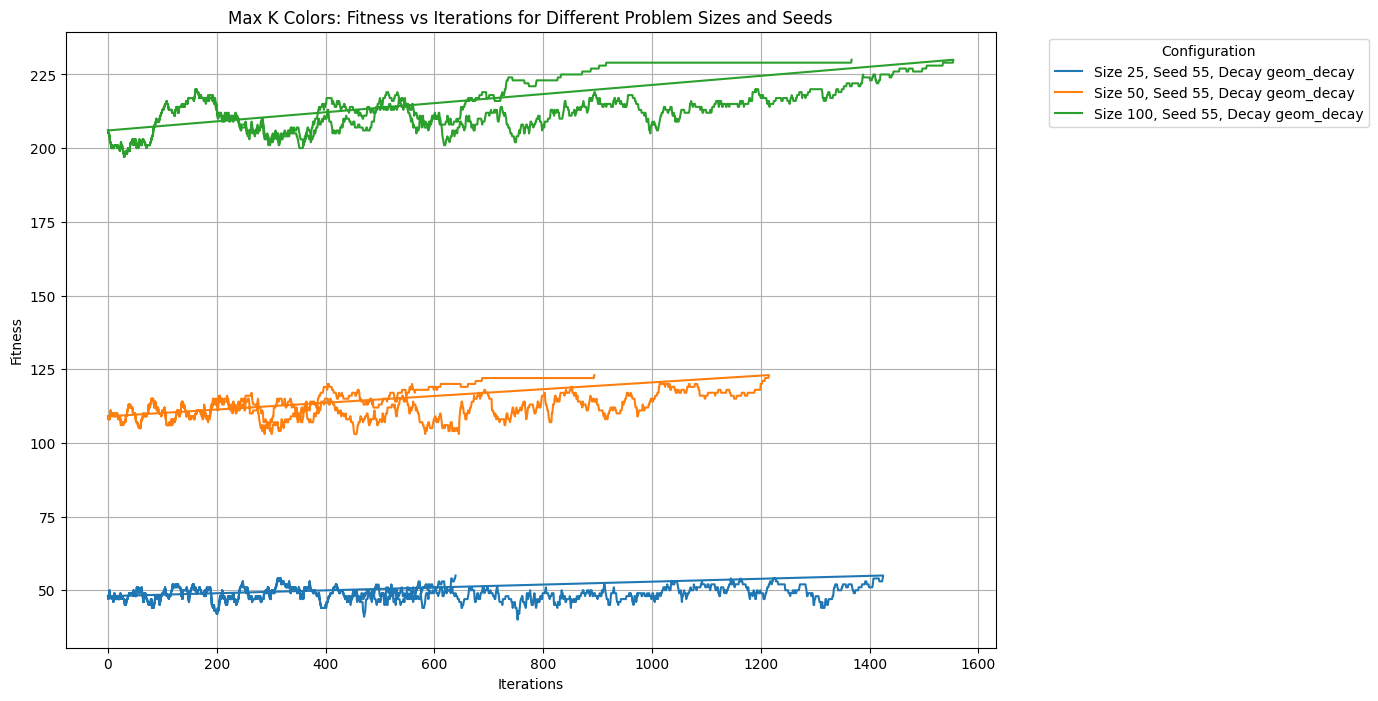

In [67]:
# Plot fitness over iterations for each problem size and seed
plt.figure(figsize=(12, 8))

for size in problem_sizes:
    for seed in seeds:
        temp_df = curve_df[(curve_df['Problem_Size'] == size) & 
                           (curve_df['Seed'] == seed)]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Size {size}, Seed {seed}, Decay {decay_name}')

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Max K Colors: Fitness vs Iterations for Different Problem Sizes and Seeds')
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [62]:
curve_df = pd.read_csv('sa_maxKcolor_experiments_curves.csv')
stats_df = pd.read_csv('sa_maxKcolor_experiments_stats.csv')

problem_sizes = [25, 50, 100]

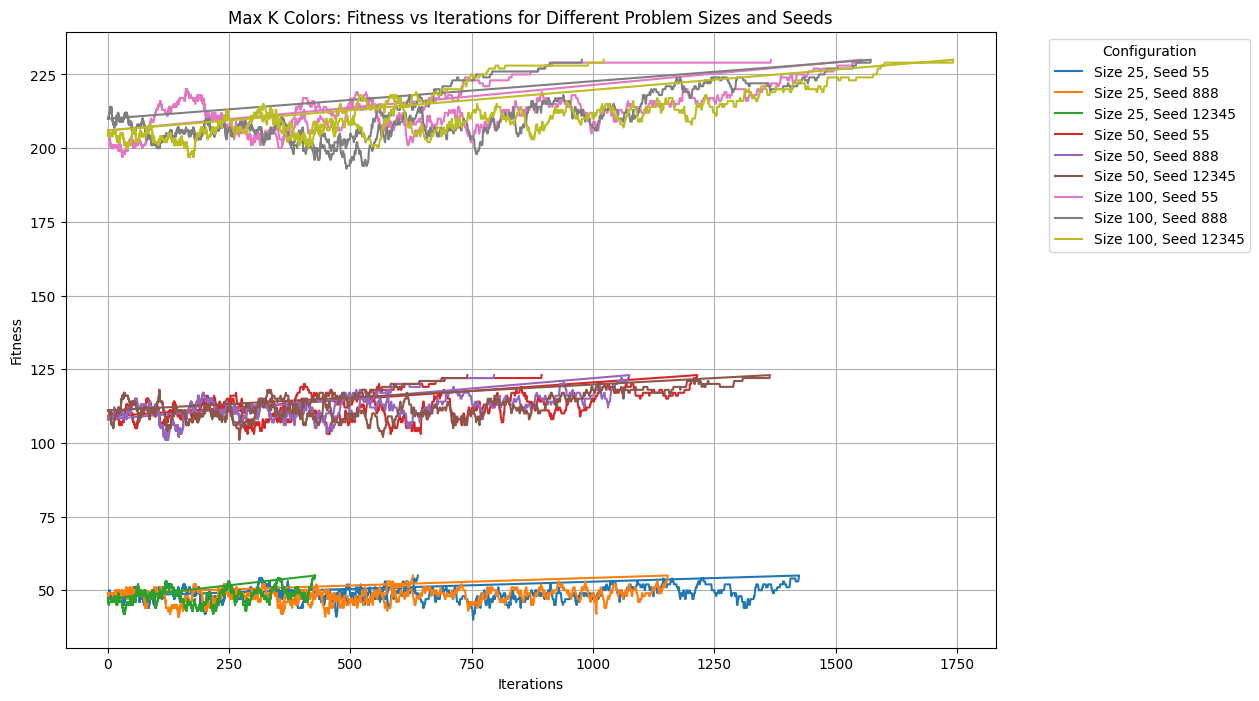

In [63]:
# Plot fitness over iterations for each problem size and seed
plt.figure(figsize=(12, 8))

for size in problem_sizes:
    for seed in seeds:
        temp_df = curve_df[(curve_df['Problem_Size'] == size) & 
                           (curve_df['Seed'] == seed)]
        plt.plot(temp_df['Iteration'], temp_df['Fitness'], label=f'Size {size}, Seed {seed}')

plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.title('Max K Colors: Fitness vs Iterations for Different Problem Sizes and Seeds')
plt.legend(title='Configuration', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


## Genetic Algorithms (GA)

In [ ]:
from mlrose_hiive.runners import GARunner

## Randomized Hill Climbing (RHC)

In [ ]:
from mlrose_hiive.runners import RHCRunner